# Problem: Predicting Credit Card Fraud

## Introduction to business scenario
You work for a multinational bank. There has been a significant increase in the number of customers experiencing credit card fraud over the last few months. A major news outlet even recently published a story about the credit card fraud you and other banks are experiencing. 

As a response to this situation, you have been tasked to solve part of this problem by leveraging machine learning to identify fraudulent credit card transactions before they have a larger impact on your company. You have been given access to a dataset of past credit card transactions, which you can use to train a machine learning model to predict if transactions are fraudulent or not. 


## About this dataset
The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred over the course of two days and includes examples of both fraudulent and legitimate transactions.

### Features
The dataset contains over 30 numerical features, most of which have undergone principal component analysis (PCA) transformations because of personal privacy issues with the data. The only features that have not been transformed with PCA are 'Time' and 'Amount'. The feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction amount. 'Class' is the response or target variable, and it takes a value of '1' in cases of fraud and '0' otherwise.

Features: 
`V1, V2, ... V28`: Principal components obtained with PCA

Non-PCA features:
- `Time`: Seconds elapsed between each transaction and the first transaction in the dataset, $T_x - t_0$
- `Amount`: Transaction amount; this feature can be used for example-dependent cost-sensitive learning 
- `Class`: Target variable where `Fraud = 1` and `Not Fraud = 0`

## Setup Lib

In [1]:
# Import Python libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
warnings.filterwarnings("ignore")
sns.set()
%matplotlib inline

## Data preprocessing and visualization 

In [2]:
df = pd.read_csv('fraud.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,'0'
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,'0'
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,'0'
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,'0'
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,'0'


From First glance. i see class column in string type , we should turn in integer type

In [4]:
mapped_class = {"'0'": 0, "'1'": 1}
df['Class'] = df['Class'].map(lambda x: mapped_class[x])

In [5]:
#Check
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

<AxesSubplot:>

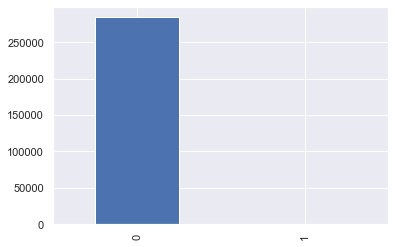

In [9]:
df['Class'].value_counts().plot.bar()

there are inbalance in target feature column ,The target variable distribution is very skewed. There are a lot of not fraud examples and very few fraud examples

In [10]:
print("the ratio of classes for 0s to the total is  "+"{}".format(284315/(284315+492)))

the ratio of classes for 0s to the total is  0.9982725143693799


In [11]:
print("the ratio of classes for 1s to the total is  "+"{}".format(492/(284315+492)))

the ratio of classes for 1s to the total is  0.001727485630620034


<AxesSubplot:xlabel='Amount', ylabel='Density'>

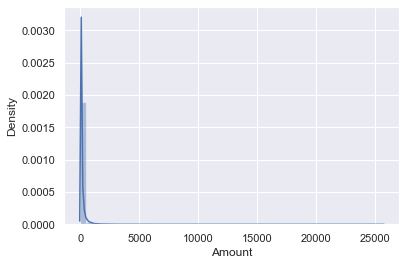

In [12]:
sns.distplot(df['Amount'])

Most of the values are closer to $100, but there are some that are bigger

<AxesSubplot:xlabel='Time', ylabel='Density'>

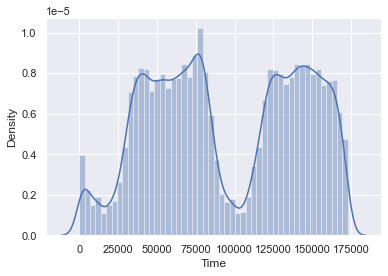

In [13]:
sns.distplot(df['Time'])

The data includes two days' worth of data where there are more credit card transactions during the day and fewer at night.

Text(0.5, 1.0, 'dataset correlation')

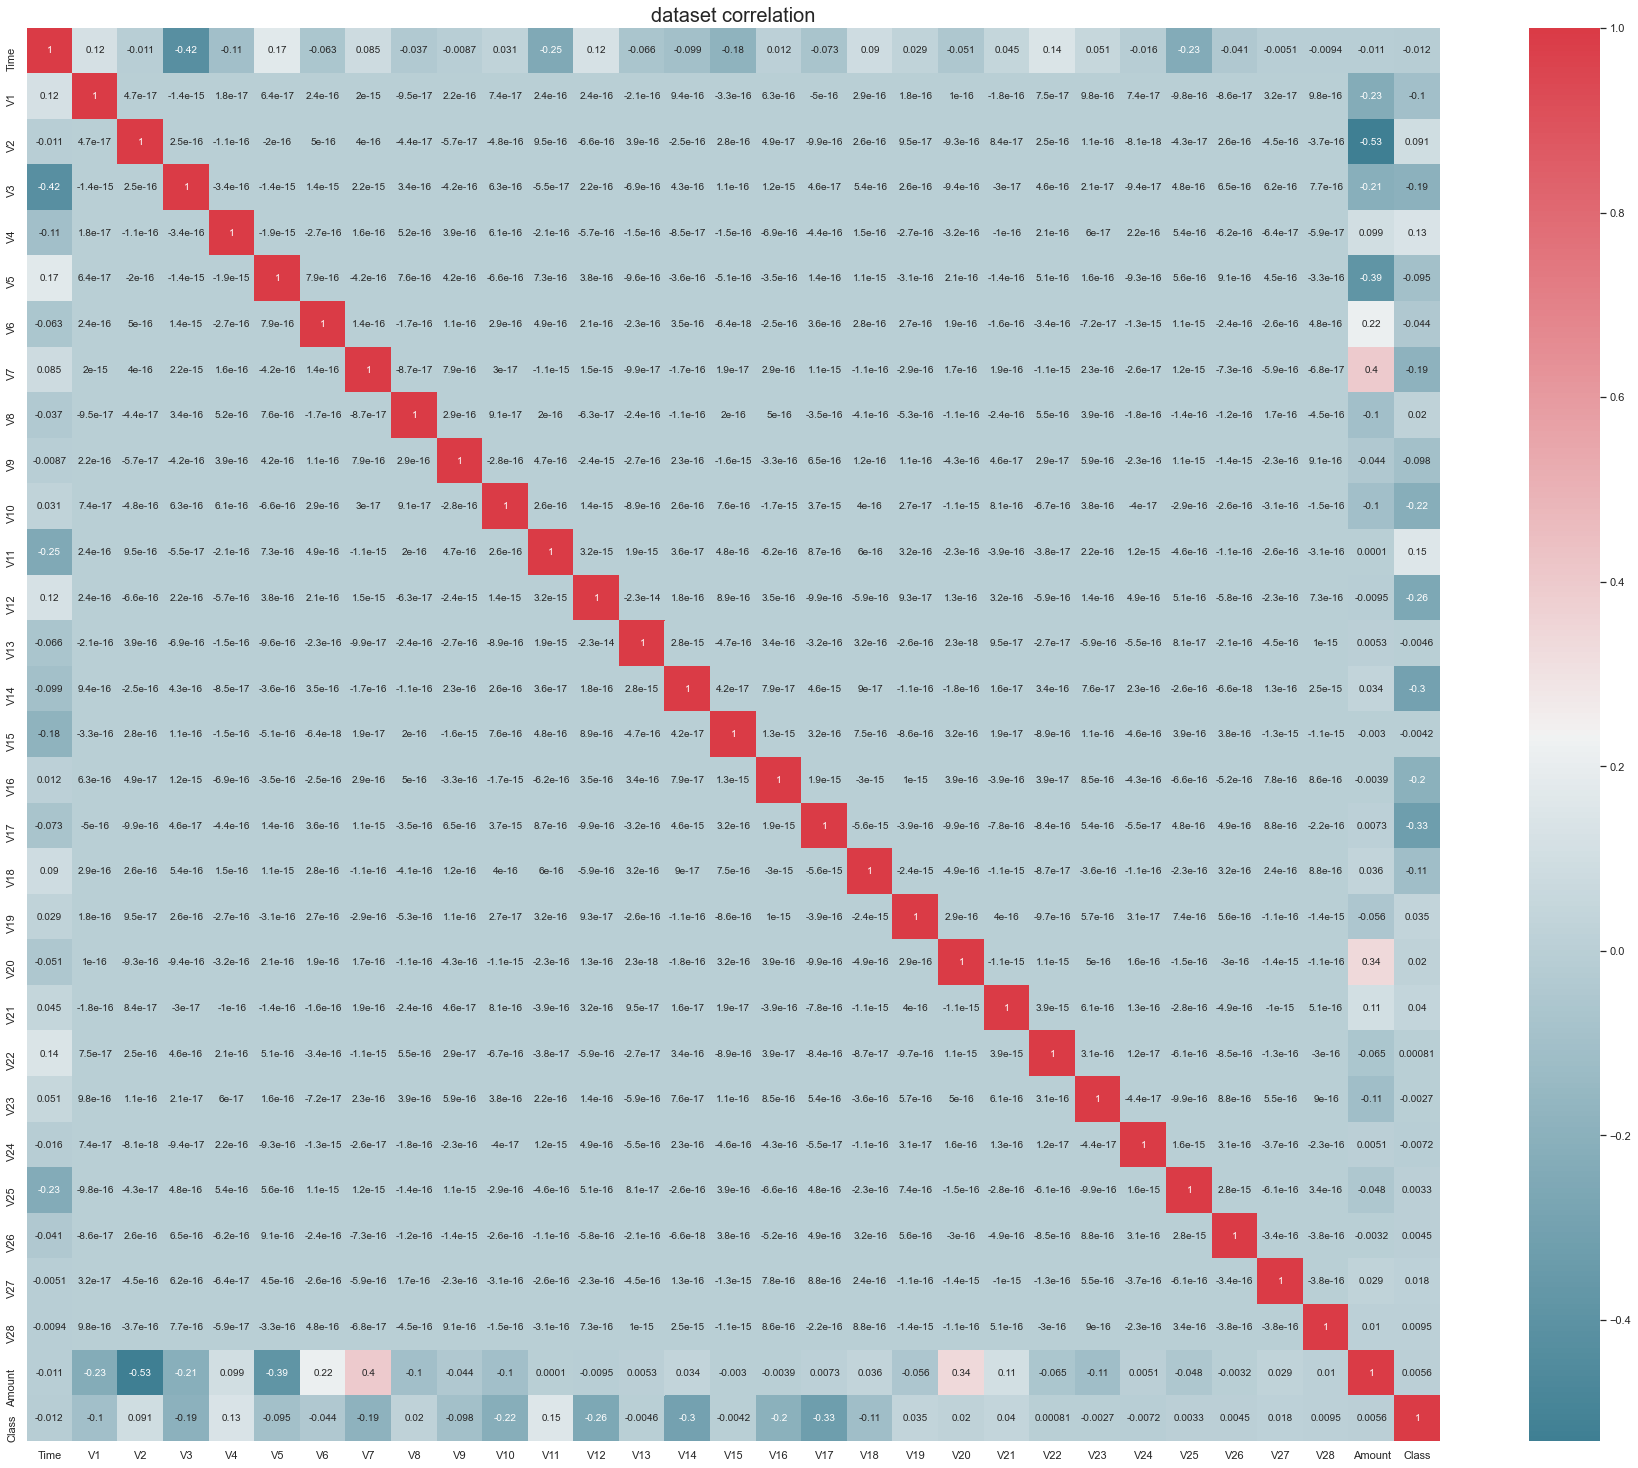

In [14]:
f, ax = plt.subplots(figsize=(32, 26))
corr = df.corr()
mp = sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot = True)
mp.set_title(label='dataset correlation', fontsize=20)

There aren't any correlated features to be removed

In [15]:
correlated_features = set()
correlation_matrix = df.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i,j])>0.9:
            col_name = correlation_matrix.columns[i]
            correlated_features.add(col_name)
print(correlated_features)

set()


## Model training

In [16]:
from sklearn.model_selection import train_test_split

# Get the feature values until the target column (not included)
X = df.values[:, :-1].astype(np.float32)

# Get the target column
y = df.values[:, -1].astype(np.float32)

In [17]:
# Get 80% of the data for training; the remaining 20% will be for validation and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(f"Length of train_features is: {X_train.shape}")
print(f"Length of train_labels is: {y_train.shape}")
print(f"Length of test_features is: {X_test.shape}")
print(f"Length of test_labels is: {y_test.shape}")

Length of train_features is: (227845, 30)
Length of train_labels is: (227845,)
Length of test_features is: (56962, 30)
Length of test_labels is: (56962,)


## Support Vector Classification

In [18]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

## Model Results

In [19]:
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

## Calculate Accuracy Test Set

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_test)

0.9983146659176293

## Calculate Accuracy train Set

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_pred_train)

0.998261976343567

## Calculate confusion matrix Test Set

In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_test)

array([[56866,     0],
       [   96,     0]], dtype=int64)

## F1-Score Precision Recall

In [23]:
from sklearn.metrics import f1_score, precision_score, recall_score

print("F1-Score : {} ".format(f1_score(y_test, y_pred_test, average="macro")))
print("Precision : {} ".format(precision_score(y_test, y_pred_test, average="macro")))
print("Recall : {} " .format(recall_score(y_test, y_pred_test, average="macro")))  

F1-Score : 0.49957831113610013 
Precision : 0.49915733295881465 
Recall : 0.5 


### why the precision and recall are around 50% while the accuracy is 99%

i think due to Imbalanced dataset

Text(0.5, 1.0, 'Original Distribution of the dataset')

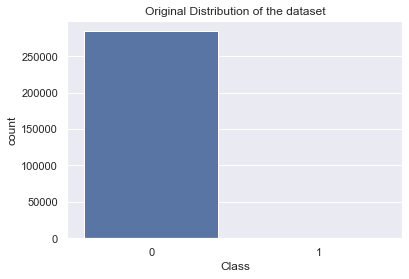

In [24]:
sns.countplot(df['Class'])
plt.title('Original Distribution of the dataset')

## SMOTE "Oversampling teqnique"

In [25]:
from imblearn.over_sampling import SMOTE

In [26]:
unique, count = np.unique(y_train, return_counts=True)
Y_train_dict_value_count = { k:v for (k,v) in zip(unique, count)}
Y_train_dict_value_count

{0.0: 227449, 1.0: 396}

In [27]:
sm = SMOTE(random_state=12)
X_res, y_res = sm.fit_sample(X, y)

In [28]:
unique, count = np.unique(y_res, return_counts=True)
y_train_smote_value_count = { k:v for (k,v) in zip(unique, count)}
y_train_smote_value_count

{0.0: 284315, 1.0: 284315}

## Model Training

In [29]:
# Get 80% of the data for training; the remaining 20% will be for validation and test
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, test_size=0.2,shuffle=True)

print(f"Length of train_features is: {X_train_res.shape}")
print(f"Length of train_labels is: {y_train_res.shape}")
print(f"Length of test_features is: {X_test_res.shape}")
print(f"Length of test_labels is: {y_test_res.shape}")

Length of train_features is: (454904, 30)
Length of train_labels is: (454904,)
Length of test_features is: (113726, 30)
Length of test_labels is: (113726,)


## SVC

In [30]:
model_enh = SVC()
model_enh.fit(X_train_res, y_train_res)
model_enh.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [31]:
y_pred_test_enh = model_enh.predict(X_test_res)
y_pred_train_enh = model_enh.predict(X_train_res)

## Model Results

### Calculate Accuracy Test Set

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_res,y_pred_test_enh)

0.584905826284227

### Calculate Accuracy train Set

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train_res,y_pred_train_enh)

0.5822745018729226

## Confusion Matrix

In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_res,y_pred_test_enh)

array([[25185, 31496],
       [15711, 41334]], dtype=int64)

## F1-Score

In [36]:
from sklearn.metrics import f1_score, precision_score, recall_score

print("F1-Score : {} ".format(f1_score(y_test_res, y_pred_test_enh, average="macro")))
print("Precision : {} ".format(precision_score(y_test_res, y_pred_test_enh, average="macro")))
print("Recall : {} " .format(recall_score(y_test_res, y_pred_test_enh, average="macro")))  

F1-Score : 0.5763637216966324 
Precision : 0.591685623806227 
Recall : 0.5844573203490443 


# XGB

In [37]:
from xgboost import XGBClassifier
model_enh2 = XGBClassifier()
model_enh2.fit(X_train_res, y_train_res)
model_enh2.get_params()

[22:47:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 8,
 'num_parallel_tree': 1,
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [38]:
y_pred_test_enh2 = model_enh2.predict(X_test_res)
y_pred_train_enh2 = model_enh2.predict(X_train_res)

## Model Results

## Calculate Accuracy Test Set

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_res,y_pred_test_enh2)

0.9998856901675958

## Calculate Accuracy Train Set

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train_res,y_pred_train_enh2)

1.0

## F1-Score

In [42]:
print("F1-Score : {} ".format(f1_score(y_test_res, y_pred_test_enh2, average="macro")))
print("Precision : {} ".format(precision_score(y_test_res, y_pred_test_enh2, average="macro")))
print("Recall : {} " .format(recall_score(y_test_res, y_pred_test_enh2, average="macro")))  

F1-Score : 0.9998856889114168 
Precision : 0.9998860808300326 
Recall : 0.9998853231241509 


## Learning Curves

[00:48:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:48:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:48:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:48:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[01:04:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:04:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:04:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:05:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[01:21:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:21:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:22:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:23:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

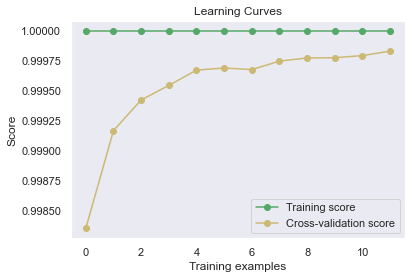

In [48]:
from sklearn.model_selection import learning_curve

def draw_learning_curves(X, y, estimator, num_trainings):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, num_trainings))

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()
    plt.title("Learning Curves")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.plot(train_scores_mean, 'o-', color="g",label="Training score")
    plt.plot(test_scores_mean, 'o-', color="y",label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()
    
draw_learning_curves(X_train_res, y_train_res, model_enh2, 12)

[01:26:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:26:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:27:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:27:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[01:30:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:30:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:30:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:30:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[01:34:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:34:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:34:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:34:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

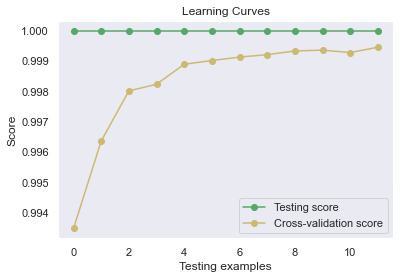

In [49]:
def draw_learning_curves(X, y, estimator, num_trainings):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, num_trainings))

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()
    plt.title("Learning Curves")
    plt.xlabel("Testing examples")
    plt.ylabel("Score")
    plt.plot(train_scores_mean, 'o-', color="g",label="Testing score")
    plt.plot(test_scores_mean, 'o-', color="y",label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()
    
draw_learning_curves(X_test_res, y_test_res, model_enh2, 12)

## Save Model

In [50]:
import joblib
# save the model to disk
filename = 'finalized_model.sav'
joblib.dump(model_enh2, filename)

['finalized_model.sav']